In [8]:
import os
import json
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.lines as mlines

## Node Ranking

In [9]:
synnet_results = '../syn_net/syn_net_6D_simulations_202110_with_G/node_rankings'
synnet_files = ['node_rankings_p270_fig1b.json', 'node_rankings_p779_fig1c.json', 'node_rankings_p1945_fig1d.json']
yeast_results = '../yeast_data/simulations202110_Orlando_2/node_rankings'
yeast_files = ['node_rankings_annot.json', 'node_rankings_no_annot.json', 'node_rankings_extra_nodes_annot.json', 'node_rankings_extra_nodes_no_annot.json']

In [10]:
def load_results(filepath):
    run_type = filepath.split('node_rankings_')[-1].split('.')[0]
    with open(filepath) as f:
        data = f.read()
    js = json.loads(data)['node_ranks']
    nr_df = pd.DataFrame(js, columns=['Node', 'Global Node Participation Score', 'SD Global Node Rank', 'Local Node Participation Score', 'SD Local Node Rank'])
    nr_df['Run Type'] = run_type
    return nr_df

In [11]:
nr_df_list = [load_results(f'{yeast_results}/{results_file}') for results_file in yeast_files]
all_nr_df = pd.concat(nr_df_list)
all_nr_df['Run Type'] = all_nr_df['Run Type'].str.replace('extra_nodes_no_annot','$S^-$$A^-$')
all_nr_df['Run Type'] = all_nr_df['Run Type'].str.replace('extra_nodes_annot','$S^-$$A^+$')
all_nr_df['Run Type'] = all_nr_df['Run Type'].str.replace('no_annot','$S^+$$A^-$')
all_nr_df['Run Type'] = all_nr_df['Run Type'].str.replace('annot','$S^+$$A^+$')
all_nr_df=all_nr_df.rename(columns={'Global Node Participation Score':"Global Node Participation Score",'Local Node Participation Score':"Local Node Participation Score"})


/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  del sys.path[0]
/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  del sys.path[0]
/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argumen

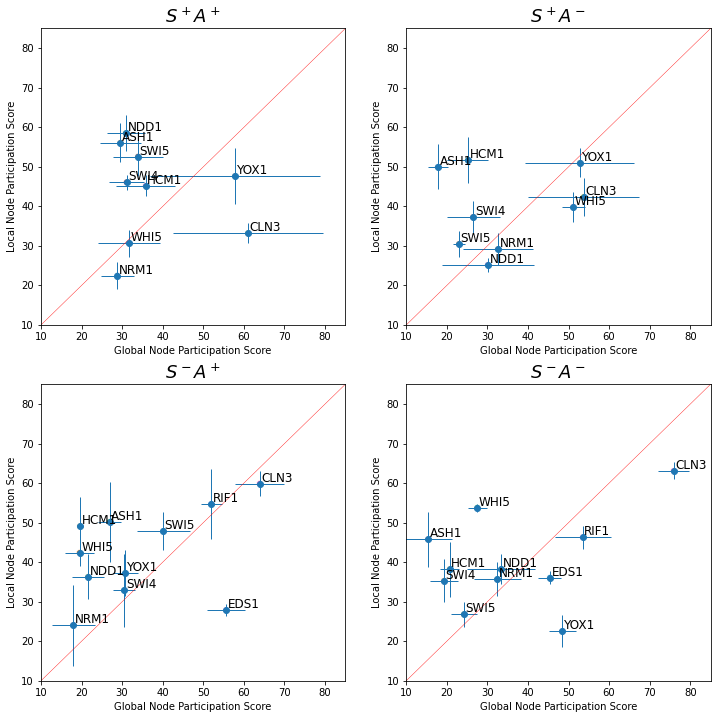

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,12])

order = ['$S^+$$A^+$', '$S^+$$A^-$', '$S^-$$A^+$', '$S^-$$A^-$']

for pidx, runtype in enumerate(order):    
    runtype_df = all_nr_df[all_nr_df['Run Type'] == runtype]

    if pidx < 2:
        sns.scatterplot(data=runtype_df, x="Global Node Participation Score", y="Local Node Participation Score", hue="Node", legend=None, ax=axes[0,pidx])
        axes[0,pidx].set_title(runtype, fontdict={'fontsize':18})
        axes[0,pidx].errorbar(runtype_df["Global Node Participation Score"], runtype_df["Local Node Participation Score"], 
                              xerr=runtype_df["SD Global Node Rank"], yerr=runtype_df["SD Local Node Rank"], 
                              fmt='.', alpha=1, linewidth=1, marker='o')
        axes[0,pidx].plot([0, 1], [0, 1], transform=axes[0,pidx].transAxes, c='r', linewidth=0.4)
        for line in range(0,runtype_df.shape[0]):
            axes[0,pidx].text(runtype_df['Global Node Participation Score'][line]+0.4, 
                              runtype_df['Local Node Participation Score'][line]+0.5, 
                              runtype_df['Node'][line], horizontalalignment='left', size='large', color='black')
    else:
        sns.scatterplot(data=runtype_df, x="Global Node Participation Score", y="Local Node Participation Score", hue="Node", legend=None, ax=axes[1,pidx-2])
        axes[1,pidx-2].set_title(runtype, fontdict={'fontsize':18})
        axes[1,pidx-2].errorbar(runtype_df["Global Node Participation Score"], runtype_df["Local Node Participation Score"], 
                              xerr=runtype_df["SD Global Node Rank"], yerr=runtype_df["SD Local Node Rank"], 
                              fmt='.', alpha=1, linewidth=1, marker='o')
        axes[1,pidx-2].plot([0, 1], [0, 1], transform=axes[1,pidx-2].transAxes, c='r', linewidth=0.4)
        for line in range(0,runtype_df.shape[0]):
            axes[1,pidx-2].text(runtype_df['Global Node Participation Score'][line]+0.4, 
                              runtype_df['Local Node Participation Score'][line]+0.5, 
                              runtype_df['Node'][line], horizontalalignment='left', size='large', color='black')
plt.setp(axes, xlim=(10, 85), ylim=(10, 85))
# plt.tight_layout()
plt.savefig('figures/yeast_node_rankings.pdf', format='pdf',bbox_inches='tight')

In [13]:
syn_nr_df_list = [load_results(f'{synnet_results}/{results_file}') for results_file in synnet_files]
syn_all_nr_df = pd.concat(syn_nr_df_list)
syn_all_nr_df['Run Type'] = syn_all_nr_df['Run Type'].str.replace('p270_fig1b','Fig. 2b Synthetic Data')
syn_all_nr_df['Run Type'] = syn_all_nr_df['Run Type'].str.replace('p779_fig1c','Fig. 2c Synthetic Data')
syn_all_nr_df['Run Type'] = syn_all_nr_df['Run Type'].str.replace('p1945_fig1d','Fig. 2d Synthetic Data')
syn_all_nr_df=syn_all_nr_df.rename({'Global Node Participation Score':"Global Node Participation Score",'Local Node Participation Score':"Local Node Participation Score"})

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[12,4])

order = ['Fig. 2b Synthetic Data', 'Fig. 2c Synthetic Data', 'Fig. 2d Synthetic Data']

for pidx, runtype in enumerate(order):
    runtype_df = syn_all_nr_df[syn_all_nr_df['Run Type'] == runtype]
    sns.scatterplot(data=runtype_df, x="Global Node Participation Score", y="Local Node Participation Score", hue="Node", legend=None, ax=axes[pidx])
    axes[pidx].set_title(runtype)
    axes[pidx].errorbar(runtype_df["Global Node Participation Score"], runtype_df["Local Node Participation Score"], 
                          xerr=runtype_df["SD Global Node Rank"], yerr=runtype_df["SD Local Node Rank"], 
                          fmt='.', alpha=1, linewidth=1, marker='o')
    axes[pidx].plot([0, 1], [0, 1], transform=axes[pidx].transAxes, c='r', linewidth=0.4)
    for line in range(0,runtype_df.shape[0]):
        axes[pidx].text(runtype_df['Global Node Participation Score'][line]+0.4, 
                          runtype_df['Local Node Participation Score'][line]+0.5, 
                          runtype_df['Node'][line], horizontalalignment='left', size='large', color='black')
    
    axes[pidx].set_xticks(np.arange(0,65,10))
    axes[pidx].set_yticks(np.arange(0,65,10))
    axes[pidx].set_title("")
# plt.tight_layout()
plt.savefig('figures/synnet_node_rankings.pdf', format='pdf',bbox_inches='tight')

/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()
/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()
/home/bree/anaconda3/envs/dat2net/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  # This is added back by InteractiveShellApp.init_path()


## Edge Ranking

In [15]:
# synnet_er_results = 'syn_net/syn_net_6D_simulations_202110_with_G/edge_rankings'
# synnet_er_files = ['master_summary_Fig1b.json', 'master_summary_Fig1c.json', 'master_summary_Fig1d.json']
yeast_er_results = '../yeast_data/simulations202110_Orlando_2/edge_rankings'
yeast_er_files = ['master_summary_annot.json', 'master_summary_no_annot.json', 'master_summary_extra_nodes_annot.json', 'master_summary_extra_nodes_no_annot.json']

In [16]:
# synnet_tp_edges = ['A=tf_act(F)',
#                    'B=tf_act(C)',
#                    'C=tf_act(E)',
#                    'C=tf_act(A)',
#                    'C=tf_rep(D)',
#                    'D=tf_rep(A)',
#                    'D=tf_rep(E)',
#                    'E=tf_act(F)',
#                    'E=tf_rep(B)',
#                    'F=tf_rep(B)']

In [17]:
def load_er_results(filepath, tp_list):
    run_name = filepath.split('master_summary_')[-1].split('.')[0]
    with open(filepath) as f:
        data = f.read()
    js = json.loads(data)
    local_medians = js['median_lem_rank_true_pos_in_rerank']
    global_medians = js['median_rerank_true_pos']
    
    er_df = pd.DataFrame([local_medians, global_medians], index=['Median Local Edge Rank', 'Median Global Edge Rank']).T
    er_df['Run'] = run_name
#     print(run_name)
#     print(f'local: medians {local_medians}, mean {statistics.mean(local_medians)}')
#     print(f'global: medians {global_medians}, mean {statistics.mean(global_medians)}')
#     print()
    return er_df

In [18]:
# synnet_er_df_list = [load_er_results(f'{synnet_er_results}/{results_file}', synnet_tp_edges) for results_file in synnet_er_files]
# synnet_all_er_df = pd.concat(synnet_er_df_list)
# synnet_all_er_melt = synnet_all_er_df.reset_index()
# synnet_all_er_melt = synnet_all_er_melt.melt(id_vars=['index','Run'], value_vars=['Median Local Edge Rank', 'Median Global Edge Rank'], var_name='Rank Type', value_name='Median Rank')

In [19]:
# b = sns.boxplot(data=synnet_all_er_melt, x="Run", y="Median Rank", hue='Rank Type', color=".8")
# s = sns.swarmplot(data=synnet_all_er_melt, x='Run', y='Median Rank', hue='Rank Type', dodge=True)
# handles_labels = s.get_legend_handles_labels()
# plt.legend(handles=swarm_handles[0][2:], labels=swarm_handles[1][2:],loc='center left', bbox_to_anchor=(1, 0.92))
# plt.tight_layout()
# plt.savefig('../draft_figures/synnet_edge_rankings.png', dpi=300, format='png')

In [20]:
yeast_tp_edges = ['ASH1=tf_act(SWI5)',
                  'ASH1=tf_rep(YOX1)',
                  'CLN3=tf_act(SWI5)',
                  'CLN3=tf_rep(SWI4)',
                  'CLN3=tf_rep(YOX1)',
                  'HCM1=tf_act(SWI4)',
                  'HCM1=tf_rep(YOX1)',
                  'HCM1=tf_rep(ASH1)',
                  'NDD1=tf_act(SWI4)',
                  'NDD1=tf_act(HCM1)',
                  'NRM1=tf_act(SWI4)',
                  'NRM1=tf_act(HCM1)',
                  'NRM1=tf_rep(YOX1)',
                  'SWI4=tf_act(SWI4)',
                  'SWI4=tf_rep(WHI5)',
                  'SWI4=tf_rep(NRM1)',
                  'SWI4=tf_rep(YOX1)',
                  'SWI5=tf_act(NDD1)',
                  'SWI5=tf_rep(YOX1)',
                  'WHI5=tf_act(HCM1)',
                  'WHI5=tf_rep(CLN3)',
                  'YOX1=tf_act(SWI4)',
                  'YOX1=tf_act(YOX1)',
                  'YOX1=tf_act(ASH1)']

In [21]:
yeast_er_df_list = [load_er_results(f'{yeast_er_results}/{results_file}', yeast_tp_edges) for results_file in yeast_er_files]
yeast_all_er_df = pd.concat(yeast_er_df_list)
yeast_all_er_melt = yeast_all_er_df.reset_index()
yeast_all_er_melt = yeast_all_er_melt.melt(id_vars=['index','Run'], value_vars=['Median Local Edge Rank', 'Median Global Edge Rank'], var_name='Rank Type', value_name='Median Rank')
yeast_all_er_melt['Run'] = yeast_all_er_melt['Run'].str.replace('extra_nodes_no_annot','$S^-$$A^-$')
yeast_all_er_melt['Run'] = yeast_all_er_melt['Run'].str.replace('extra_nodes_annot','$S^-$$A^+$')
yeast_all_er_melt['Run'] = yeast_all_er_melt['Run'].str.replace('no_annot','$S^+$$A^-$')
yeast_all_er_melt['Run'] = yeast_all_er_melt['Run'].str.replace('annot','$S^+$$A^+$')

In [22]:
sns.boxplot(data=yeast_all_er_melt, x='Run', y='Median Rank', hue='Rank Type')
plt.xlabel("Scenario")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.92))
plt.tight_layout()
plt.savefig('figures/yeast_edge_rankings.pdf', format='pdf')